In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stardist = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad')

In [3]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')

In [4]:
folder = '../data/xenium/outs/'

# Read the data
adata = sc.read_10x_h5(folder + 'cell_feature_matrix.h5')

# Load the cell type annotations
cell_type_df = pd.read_csv(folder + 'insitu_replicate_1_annotation.csv', index_col=0)

# Ensure index consistency and add 'cell_type' to adata
cell_type_df.index = cell_type_df.index.astype(str)
adata.obs['cell_type'] = cell_type_df['Cluster']

# Load additional metadata and add centroid coordinates to adata
cell_meta_df = pd.read_csv(folder + 'cells.csv', index_col=0)
cell_meta_df.index = cell_meta_df.index.astype(str)
adata.obs[['x_centroid', 'y_centroid']] = cell_meta_df[['x_centroid', 'y_centroid']]
adata.obs['cell_id'] = cell_meta_df.index

# Filter out unlabeled cells
adata = adata[adata.obs['cell_type'] != 'Unlabeled']




In [5]:
import pandas as pd

# Create a DataFrame from adata_stardist with the cell_id and CellType
stardist_df = stardist.obs[['cell_id', 'CellType']]
stardist_df = stardist_df[~stardist_df['cell_id'].duplicated(keep='first')]
# Check for duplicates in cell_id
if stardist_df['cell_id'].duplicated().any():
    print("Duplicates found in adata_stardist:")
    print(stardist_df[stardist_df['cell_id'].duplicated(keep=False)])
else:
    print("No duplicates found in adata_stardist.")



No duplicates found in adata_stardist.


In [6]:
import numpy as np
# Now, align and merge the CellType information with adata based on cell_id
# Reindex stardist_df to match the cell_id in adata and fill missing values with 'not_selected'

adata.obs['stardist_cell_type'] = adata.obs['cell_id'].map(stardist_df['CellType']).astype(str)
adata


/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_18177/502827376.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stardist_cell_type'] = adata.obs['cell_id'].map(stardist_df['CellType']).astype(str)


AnnData object with n_obs × n_vars = 159226 × 313
    obs: 'cell_type', 'x_centroid', 'y_centroid', 'cell_id', 'stardist_cell_type'
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
adata.obs['stardist_cell_type'] = adata.obs['stardist_cell_type'].replace('nan', 'not_selected')


In [8]:
adata.obs

cell_type   x_centroid   y_centroid cell_id   
1               DCIS_1   847.259912   326.191365       1  \
2               DCIS_1   826.341995   328.031830       2   
4       Invasive_Tumor   824.228409   334.252643       4   
5               DCIS_1   841.357538   332.242505       5   
8               DCIS_1   828.726239   341.712347       8   
...                ...          ...          ...     ...   
167776          DCIS_2  7455.475342  5114.875415  167776   
167777          DCIS_1  7483.727051  5111.477490  167777   
167778          DCIS_2  7470.159424  5119.132056  167778   
167779          DCIS_1  7477.737207  5128.712817  167779   
167780          DCIS_2  7489.376562  5123.197778  167780   

           stardist_cell_type  
1                 Endothelial  
2                      DCIS_2  
4                      DCIS_2  
5       T_Cell_&_Tumor_Hybrid  
8                      DCIS_2  
...                       ...  
167776           not_selected  
167777           not_selected  
167778           not_selected  
167779           not_selected  
167780           not_selected  

[159226 rows x 5 columns]

In [13]:
stardist_df

cell_id       CellType
0       128986         DCIS_2
1       144585    Endothelial
2       140484         DCIS_2
3       131974  Macrophages_2
4        11427         DCIS_2
...        ...            ...
88431   142942  Myoepi_ACTA2+
88432   131200        Stromal
88433   140498         DCIS_2
88434   143461         DCIS_2
88435   131635   CD8+_T_Cells

[85716 rows x 2 columns]

In [9]:
import pandas as pd

# Create a DataFrame from adata_stardist with the cell_id and CellType
voronoi_df = voronoi.obs[['cell_id', 'CellType']]
voronoi_df = voronoi_df[~voronoi_df['cell_id'].duplicated(keep='first')]
# Check for duplicates in cell_id
if voronoi_df['cell_id'].duplicated().any():
    print("Duplicates found in adata_stardist:")
    print(voronoi_df[voronoi_df['cell_id'].duplicated(keep=False)])
else:
    print("No duplicates found in adata_stardist.")



No duplicates found in adata_stardist.


In [10]:
import numpy as np
# Now, align and merge the CellType information with adata based on cell_id
# Reindex stardist_df to match the cell_id in adata and fill missing values with 'not_selected'
adata.obs['voronoi_cell_type'] = adata.obs['cell_id'].map(voronoi_df['CellType']).astype(str)

adata


AnnData object with n_obs × n_vars = 159226 × 313
    obs: 'cell_type', 'x_centroid', 'y_centroid', 'cell_id', 'stardist_cell_type', 'voronoi_cell_type'
    var: 'gene_ids', 'feature_types', 'genome'

In [11]:
adata.obs['voronoi_cell_type'] = adata.obs['voronoi_cell_type'].replace('nan', 'not_selected')

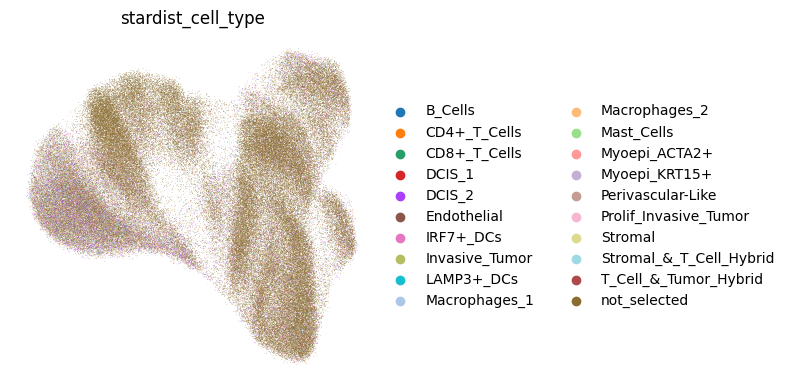

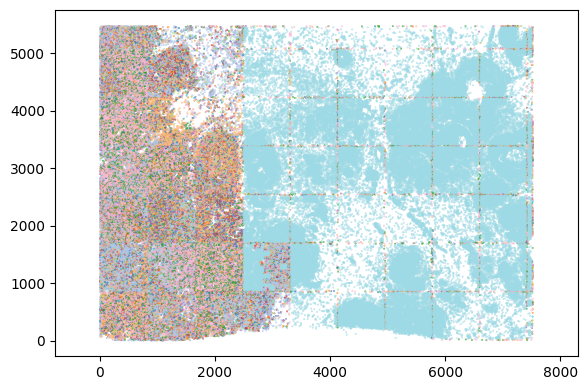

In [14]:
# Normalize and log-transform the data
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)
sc.pp.log1p(adata)

# Perform PCA, neighborhood graph, and UMAP
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# Plot UMAP colored by cell type
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sc.pl.umap(adata, color=['stardist_cell_type'], frameon=False, show=False, ax=ax)
plt.tight_layout()
plt.show()

# Plot the spatial distribution of cells colored by cell type
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
cell_type_codes, cell_type_labels = pd.factorize(adata.obs['stardist_cell_type'])
ax.scatter(adata.obs['x_centroid'], adata.obs['y_centroid'], c=cell_type_codes, s=0.1, cmap='tab20')
plt.axis('equal')
plt.tight_layout()
plt.show()

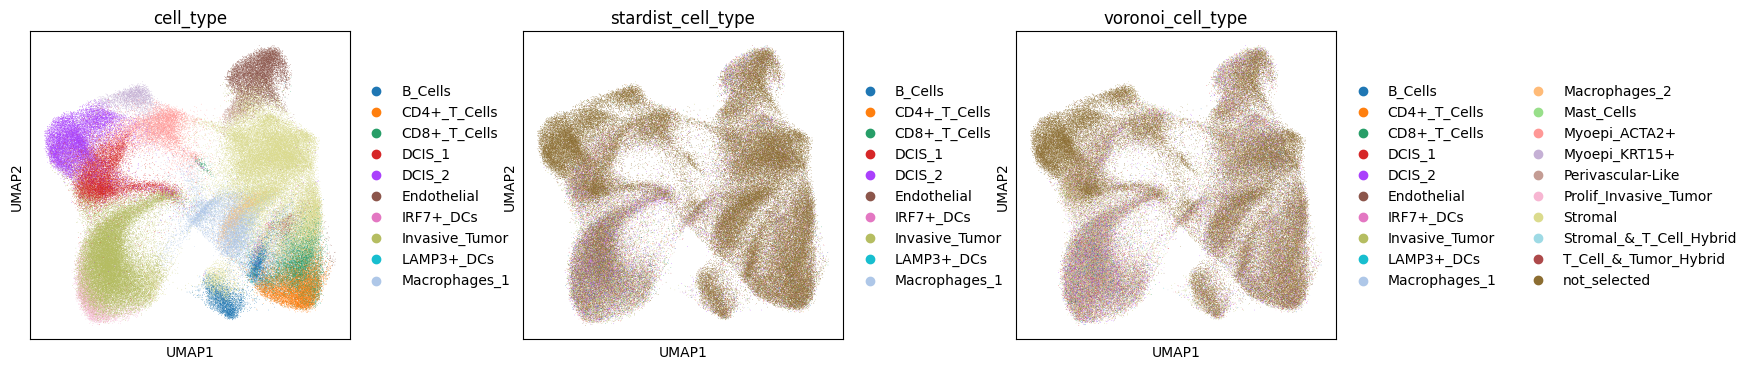

In [82]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["cell_type", "stardist_cell_type", 'voronoi_cell_type'], wspace=0.4)

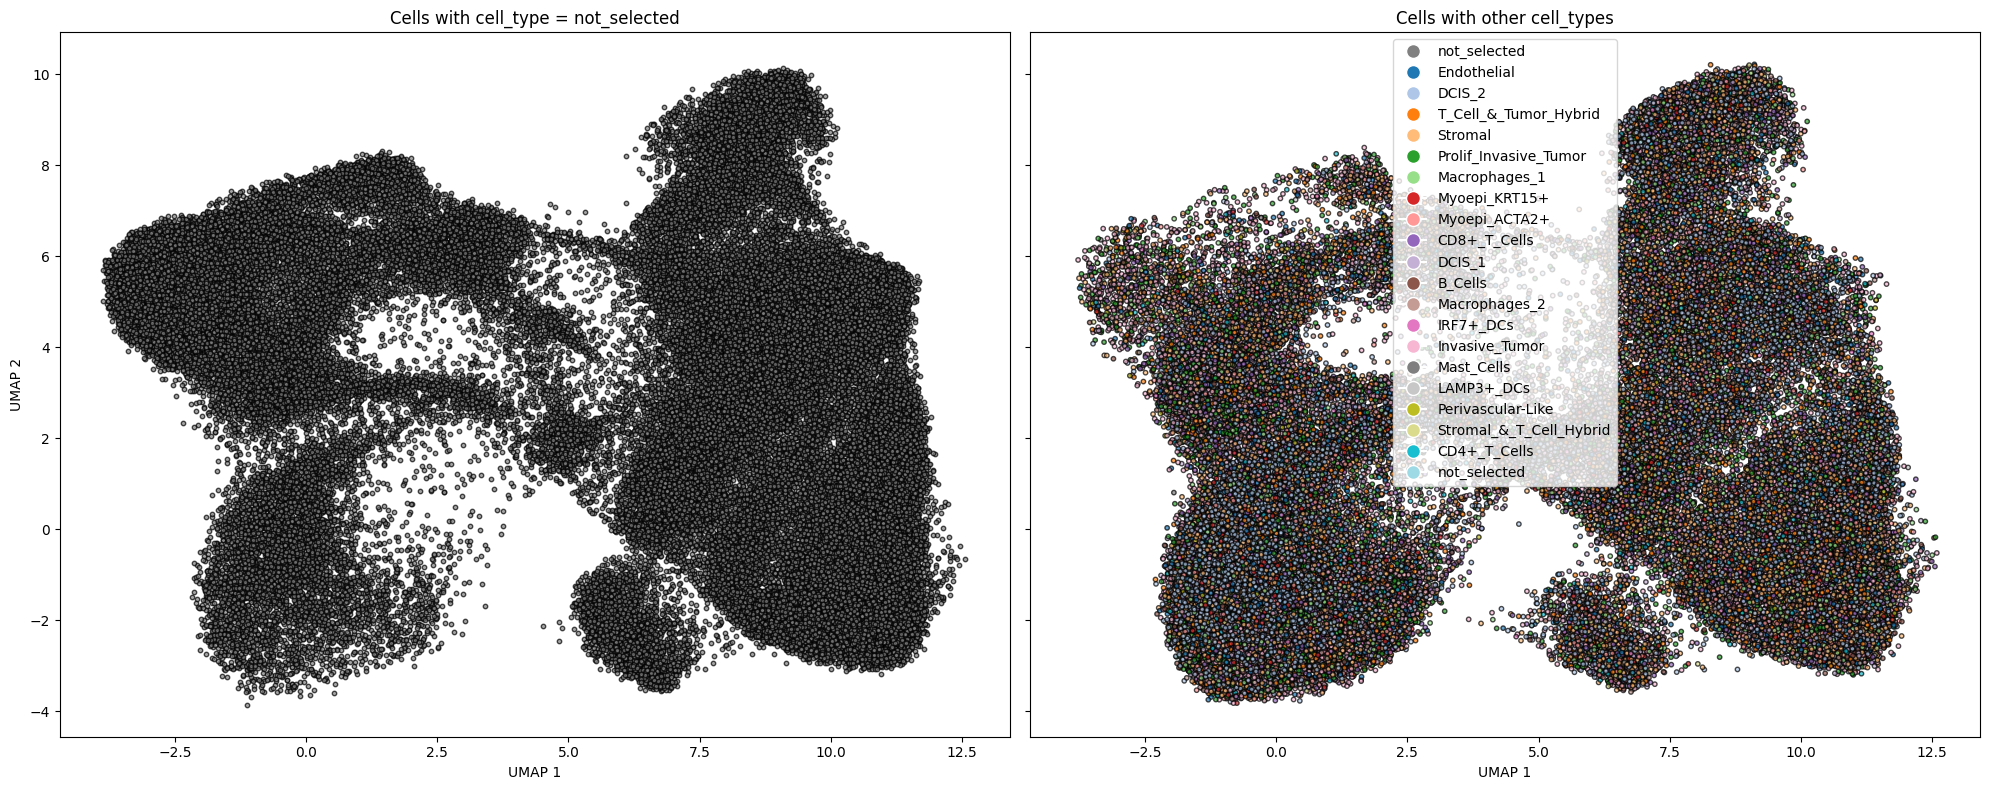

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract UMAP coordinates
umap_coords = adata.obsm['X_umap']

stardist_cell_type = adata.obs['stardist_cell_type'].astype(str)

# Define colors for 'cell_type' and 'stardist_cell_type'
# Define color for 'not_selected'
default_color = 'grey'

# Define unique stardist_cell_type and corresponding colors
stardist_unique = pd.Series(stardist_cell_type).unique()
color_map = plt.get_cmap('tab20', len(stardist_unique))  # Choose a colormap with enough distinct colors
color_dict = {cell_type: color_map(i / len(stardist_unique)) for i, cell_type in enumerate(stardist_unique)}

# Map stardist_cell_type to colors, fallback to 'grey' for 'not_selected'
stardist_colors = np.array([color_dict.get(x, default_color) for x in stardist_cell_type])

# Create the plot with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

# Plot the left subplot: 'cell_type' == 'not_selected' in grey
axs[0].scatter(umap_coords[stardist_cell_type == 'not_selected', 0], umap_coords[stardist_cell_type == 'not_selected', 1],
               c=default_color, s=10, alpha=0.7, edgecolor='k')
axs[0].set_title('Cells with cell_type = not_selected')
axs[0].set_xlabel('UMAP 1')
axs[0].set_ylabel('UMAP 2')

# Plot the right subplot: all other cell types with stardist colors
axs[1].scatter(umap_coords[stardist_cell_type != 'not_selected', 0], umap_coords[stardist_cell_type != 'not_selected', 1],
               c=stardist_colors[stardist_cell_type != 'not_selected'], s=10, alpha=0.7, edgecolor='k')
axs[1].set_title('Cells with other cell_types')
axs[1].set_xlabel('UMAP 1')

# Add a colorbar for the second plot to show stardist cell type colors
# Create a legend for the second plot
handles = [plt.Line2D([0], [0], marker='o', color='w', label='not_selected',
                      markerfacecolor='grey', markersize=10)]
handles += [plt.Line2D([0], [0], marker='o', color='w', label=stardist_cell_type,
                       markerfacecolor=color, markersize=10) for stardist_cell_type, color in color_dict.items()]

# Adding a colorbar might not be appropriate in this context, so we skip it.

# Add a legend to the second subplot
axs[1].legend(handles=handles, loc='best')

# Show plot
plt.tight_layout()
plt.show()


In [101]:
adata

AnnData object with n_obs × n_vars = 159226 × 313
    obs: 'cell_type', 'x_centroid', 'y_centroid', 'cell_id', 'stardist_cell_type', 'voronoi_cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'stardist_cell_type_colors', 'voronoi_cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

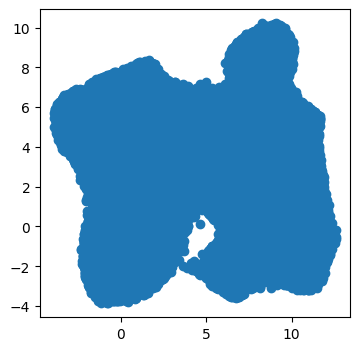

In [105]:
plt.scatter(adata.obsm["X_umap"][:,0], adata.obsm["X_umap"][:,1])

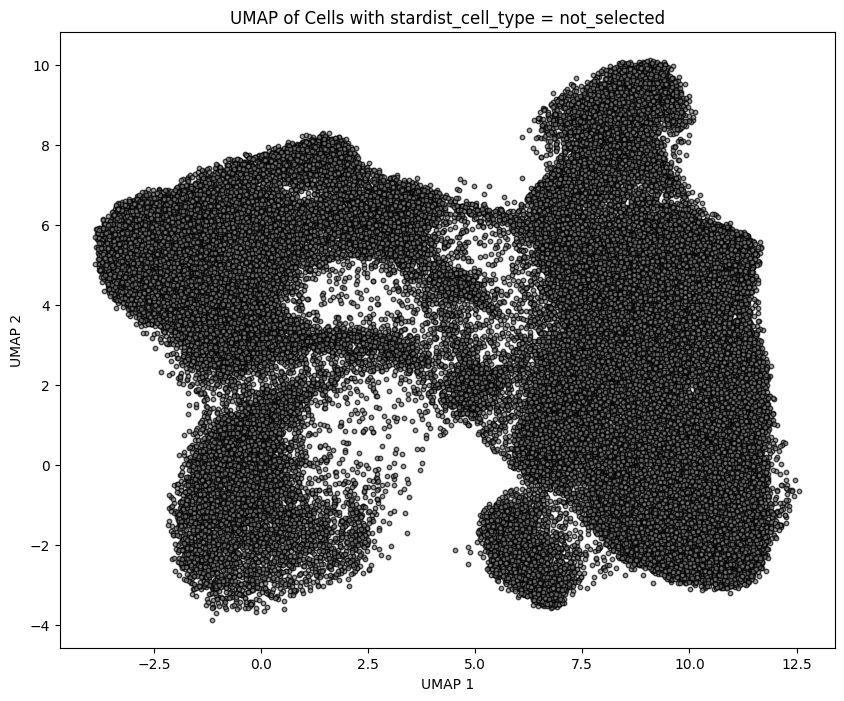

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Extract UMAP coordinates from the original AnnData object
umap_coords = adata.obsm['X_umap']

# Extract cell types
stardist_cell_type = adata.obs['stardist_cell_type']

# Filter UMAP coordinates where stardist_cell_type is 'not_selected'
mask = stardist_cell_type == 'not_selected'
filtered_umap_coords = umap_coords[mask]
filtered_cell_type = stardist_cell_type[mask]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot only cells with stardist_cell_type == 'not_selected'
ax.scatter(filtered_umap_coords[:, 0], filtered_umap_coords[:, 1], c='grey', s=10, alpha=0.7, edgecolor='k')

# Add titles and labels
ax.set_title('UMAP of Cells with stardist_cell_type = not_selected')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.show()


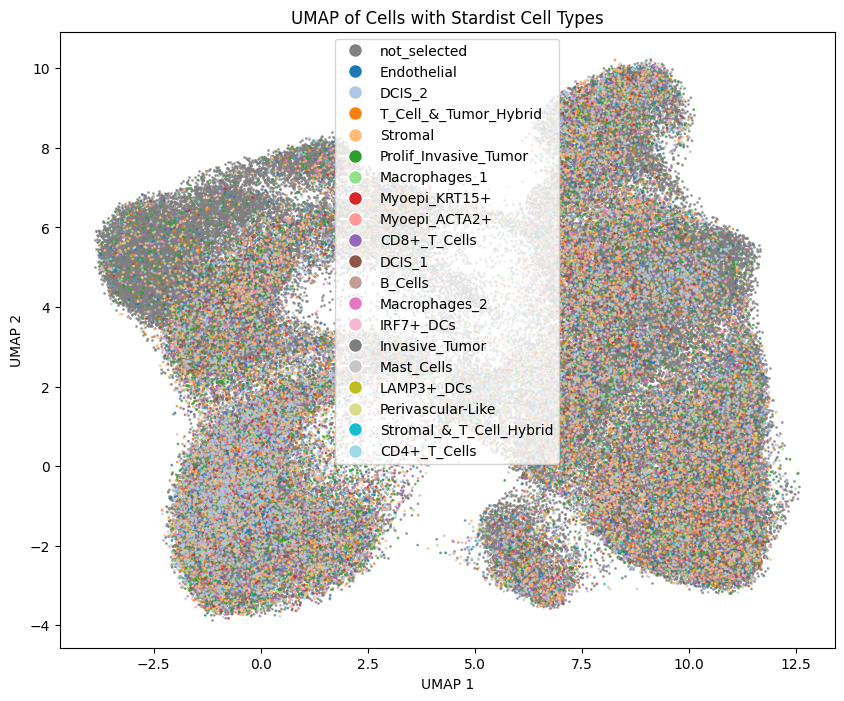

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Extract UMAP coordinates from the original AnnData object
umap_coords = adata.obsm['X_umap']

# Extract cell types
stardist_cell_type = adata.obs['stardist_cell_type']

# Filter UMAP coordinates where stardist_cell_type is 'not_selected'
mask_not_selected = stardist_cell_type == 'not_selected'
umap_coords_not_selected = umap_coords[mask_not_selected]

# Filter UMAP coordinates where stardist_cell_type is not 'not_selected'
mask_other = stardist_cell_type != 'not_selected'
umap_coords_other = umap_coords[mask_other]
stardist_cell_type_other = stardist_cell_type[mask_other]

# Define colors for non-'not_selected' cells
stardist_unique = pd.Series(stardist_cell_type_other).unique()
color_map = plt.get_cmap('tab20', len(stardist_unique))  # Choose a colormap with enough distinct colors
color_dict = {cell_type: color_map(i / len(stardist_unique)) for i, cell_type in enumerate(stardist_unique)}

# Map non-'not_selected' stardist_cell_type to colors
stardist_colors = np.array([color_dict.get(x, 'grey') for x in stardist_cell_type_other])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot cells with stardist_cell_type == 'not_selected' in grey
ax.scatter(umap_coords_not_selected[:, 0], umap_coords_not_selected[:, 1],
           c='grey', s=1, alpha=0.7, edgecolor=None, label='not_selected')

# Overlay cells with stardist_cell_type != 'not_selected'
ax.scatter(umap_coords_other[:, 0], umap_coords_other[:, 1],
           c=stardist_colors, s=1, alpha=0.7, edgecolor=None, label='other cell types')

# Create a legend manually
# Prepare legend entries for the non-'not_selected' types
handles = [plt.Line2D([0], [0], marker='o', color='w', label='not_selected',
                      markerfacecolor='grey', markersize=10)]
handles += [plt.Line2D([0], [0], marker='o', color='w', label=cell_type,
                       markerfacecolor=color, markersize=10) for cell_type, color in color_dict.items()]
ax.legend(handles=handles, loc='best')

# Add titles and labels
ax.set_title('UMAP of Cells with Stardist Cell Types')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

plt.show()
